In [37]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [38]:
from get_aq_data import get_flo_data, ID_to_name

In [39]:
data, hourly_mean, daily_mean = get_flo_data()

In [40]:
all_site_data = data.mean(axis=1)

In [41]:
weekday_index = all_site_data[(all_site_data.index.dayofweek >= 0) & (all_site_data.index.dayofweek <= 4)].index
weekend_index = all_site_data[all_site_data.index.dayofweek >= 5].index

In [42]:
weekday = all_site_data.loc[weekday_index]
weekend = all_site_data.loc[weekend_index]

In [43]:
weekday_15min_mean = weekday.groupby(weekday.index.time).mean()
weekday_15min_std = weekday.groupby(weekday.index.time).std()

weekend_15min_mean = weekend.groupby(weekend.index.time).mean()
weekend_15min_std = weekend.groupby(weekend.index.time).std()

### Without uncertainty

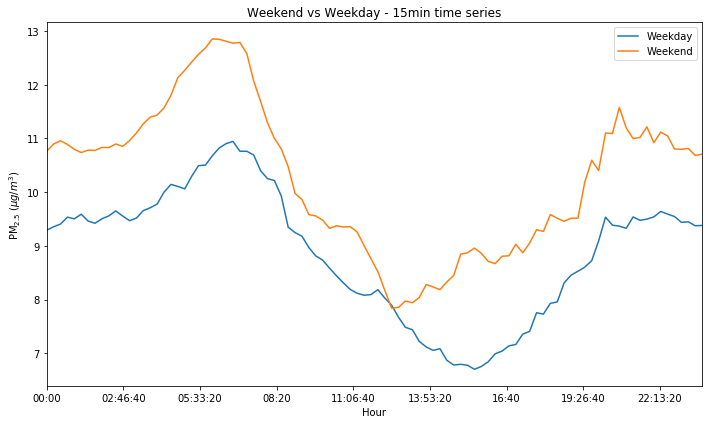

In [44]:
ax = weekday_15min_mean.plot(figsize=(10, 6), label='Weekday')
weekend_15min_mean.plot(ax=ax, label='Weekend')
plt.legend()
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Hour')
plt.title('Weekend vs Weekday - 15min time series')
plt.tight_layout()
plt.savefig('graphs/WeekendVsWeekday_15minTimeSeries.png', dpi=300)

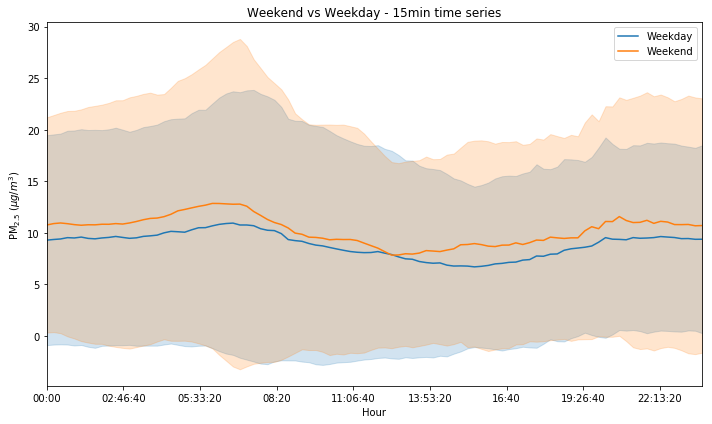

In [45]:
ax = weekday_15min_mean.plot(figsize=(10, 6), label='Weekday')
plt.fill_between(weekday_15min_mean.index, weekday_15min_mean - weekday_15min_std, weekday_15min_mean + weekday_15min_std, alpha=0.2, color='C0')
weekend_15min_mean.plot(ax=ax, label='Weekend')
plt.fill_between(weekend_15min_mean.index, weekend_15min_mean - weekend_15min_std, weekend_15min_mean + weekend_15min_std, alpha=0.2, color='C1')
plt.legend()
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Hour')
plt.title('Weekend vs Weekday - 15min time series')
plt.tight_layout()
plt.savefig('graphs/WeekendVsWeekday_15minTimeSeries_WithUncertainty.png', dpi=300)